---
<div>
    <img src='https://upload.wikimedia.org/wikipedia/commons/6/6f/Logo-udla.jpg' with='50' height='15'align=center> 
</div>

---
<center><h1>Facultad de Ingeniería y Negocios</h1></center>
<center><h1>Magíster en Data Science</h1></center>
<center><h3>Profesor Sr. Jorge Castillo</h3></center>
<center><h3>Profesor Sr. Patricio Araneda</h3></center>

---

<h2><font color='darkcyan'>Examen Machine Learning I</font></h2>
<h3><font color='IndianRed'>Problema 2: Implementando un sistema de recomendación</font></h3>

<p1><b><h3>Nombre: Didimo Escobar</h3></b></p1>

<p1><b>GitHub: https://github.com/descobardos/MG-Data-Science/tree/main/Machine%20Learning%20I</b></p1>

<p2><b>Email: descobardos@gmail.com</b></p2>
<br></br>

> El objetivo y espiritu de este proceso es evaluar los contenidos aprendidos durante este bimestre en Machine Learning I, que aborda el aprendizaje no supervisado.
>


#### Problema 2: Implementando un sistema de recomendación


<p style='text-align: justify;'>En la siguiente URL: <b>https://tinyurl.com/4hs9db8n</b> ud accederá a un repositorio donde se encuentra un dataset de compra de diferentes tipos de abarrotes. La primera columna es un identificador de boleta, la segunda es la fecha de compra y la tercera el producto comprado.</p>

<p style='text-align: justify;'>Implemente un sistema recomendador usando como base el algoritmo Apriori. Para ello, debe hacer un análisis de datos adecuado para poder ejecutar el algoritmo. Compare diferentes agrupaciones temporales y concluya.</p>

<p style='text-align: justify;'>Opcional (puntaje bonus): Si es posible, despliegue el sistema en un entorno web, de modo de constatar que el sistema recomendador funciona en un entorno e-commerce.</p>


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from apyori import apriori

plt.rcParams['figure.figsize'] = 16, 6

# settings para pandas
pd.set_option('display.max_columns', 500)

# settings para 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [51]:
# se selecciona archivo de 10.000 registros desde repositorio GITHUB
url = 'https://raw.githubusercontent.com/jorgeston/datasets/master/transacciones_abarrotes.csv'

df = pd.read_csv(url, encoding='latin-1', sep=',')

> <font color='darkcyan'><b><h2>Reflexión general </h2></b></font>
>


In [52]:
df.shape

(38765, 3)

In [53]:
#Cuenta el numero de elementos unicos en un axis especifico. Puede ingnorar valores NaN
df.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

In [54]:
#primeros cinco registros
df.head(n=5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [55]:
#ultimos cinco registros
df.tail(n=5)

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [56]:
# se identifica la forma del dataset
print(f'La cantidad de columnas del dataset es de: \033[94m {df.shape[1]} \033[0m y la cantidad de filas es de: \033[94m {df.shape[0]} \033[0m ')

La cantidad de columnas del dataset es de:  3  y la cantidad de filas es de:  38765  


In [57]:
print(f'La cantidad de valores NaN es de: \033[94m{df.isnull().sum().sum()}\033[0m en todo el dataset')

La cantidad de valores NaN es de: 0 en todo el dataset


> <font color='darkcyan'><b><h2>Tipo de Dato</h2></b></font>
>


In [58]:
# contexto del dataset y tipo de variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


> <font color='darkcyan'><b><h2>Pre Procesamiento general</h2></b></font>
>


In [61]:
# transformación de date a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# extraccion de año, mes, día de la semana
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.dayofweek)

# creación de listas
DaysOfWeek = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
MonthsOfYear = ['Enero', 'Febrerp', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

> <font color='darkcyan'><b><h2>Exploración de datos</h2></b></font>
>


### Comportamiento de las compras en la semana y en los meses del año

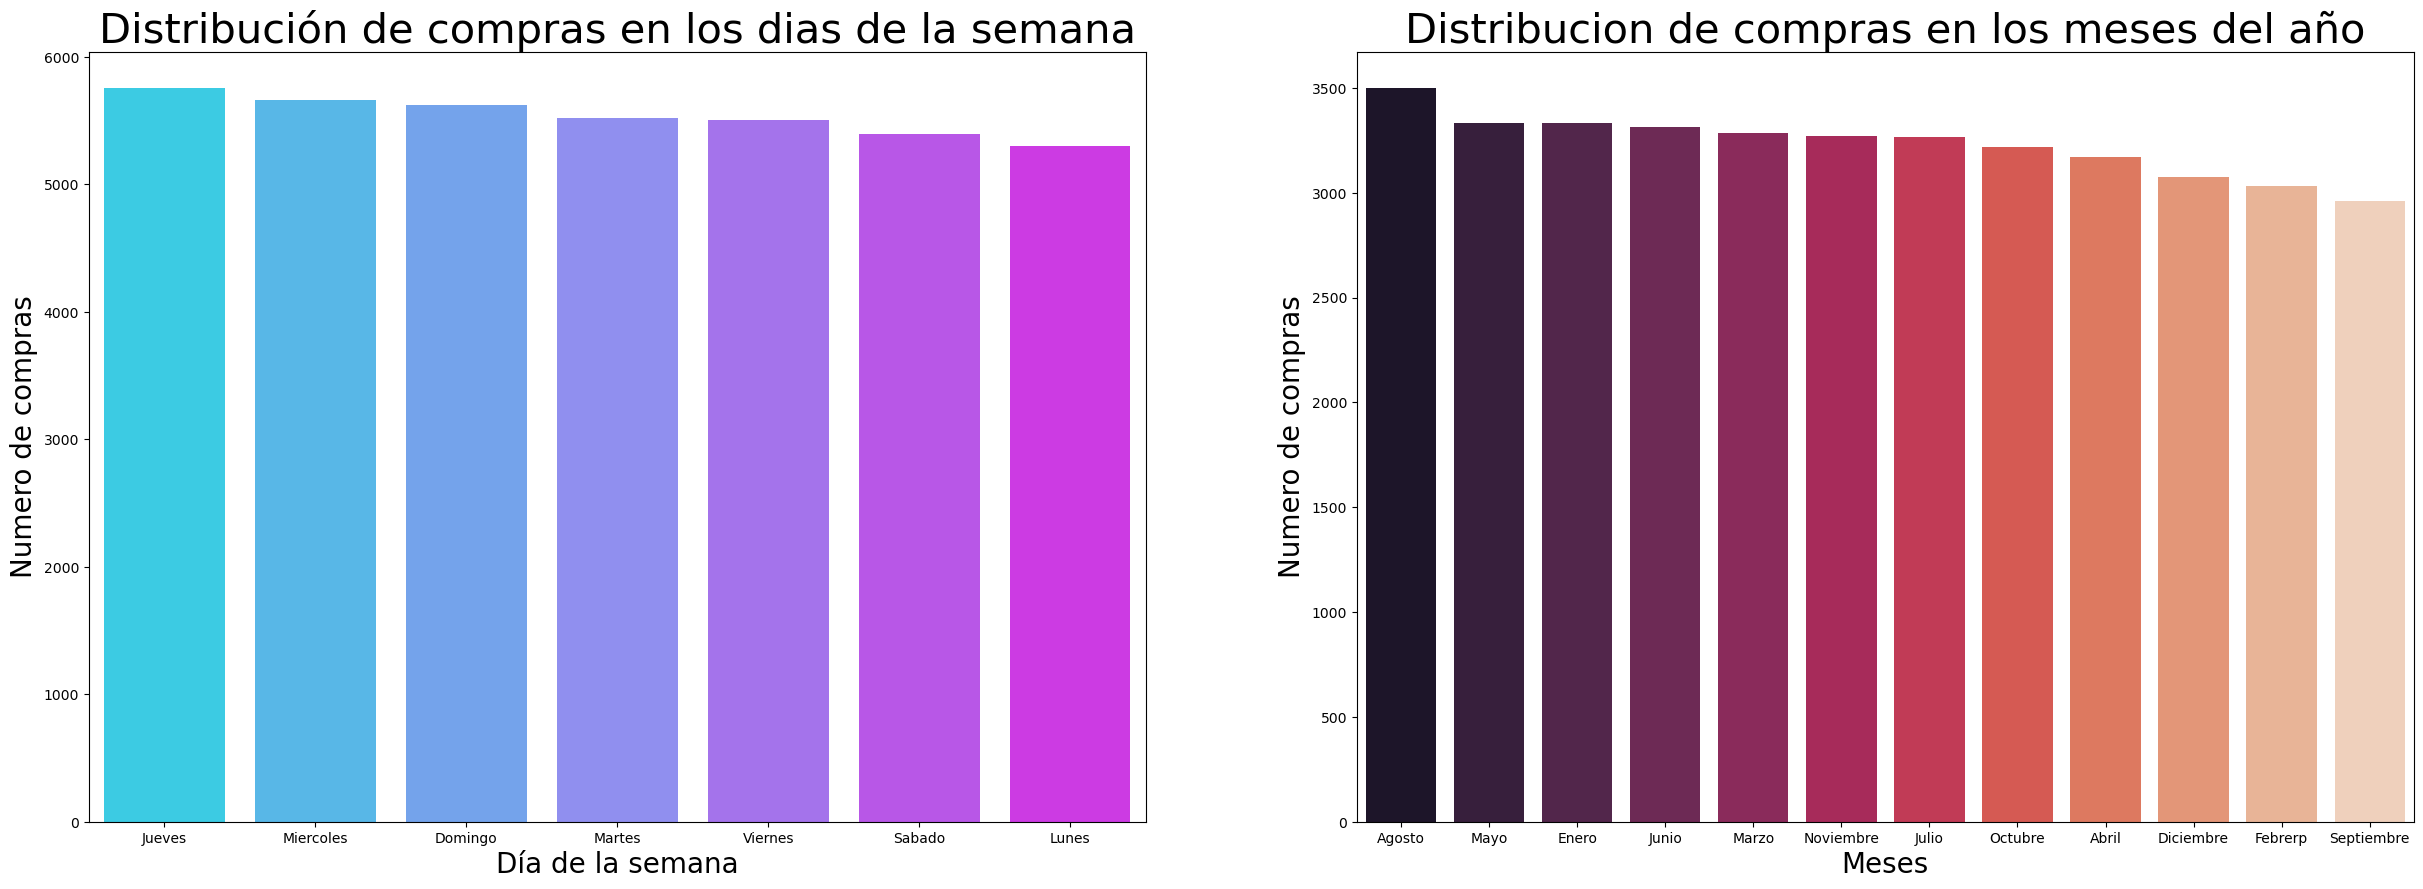

In [72]:
f, ax = plt.subplots(1,2,figsize=(30, 10))

Frame = pd.DataFrame(DaysOfWeek)
Compras = []
for index, day in enumerate(DaysOfWeek):
    Filter = df[df['Day'] == index]
    Compras.append(len(Filter))

Frame[1] = Compras
Frame = Frame.sort_values(by = 1,ascending=False)

Plot = sns.barplot(x = Frame[0], y = Frame[1], palette='cool', ax=ax[0])
Plot.set_xlabel('Día de la semana', fontsize=20)
Plot.set_ylabel('Numero de compras', fontsize=20)
Plot.set_title('Distribución de compras en los dias de la semana', fontsize=30)

Frame = pd.DataFrame(MonthsOfYear)
Compras = []
for index, Month in enumerate(MonthsOfYear):
    Filter = df[df['Month'] == index+1]
    Compras.append(len(Filter))

Frame[1] = Compras
Frame = Frame.sort_values(by = 1,ascending=False)

Plot2 = sns.barplot(x = Frame[0], y = Frame[1], palette='rocket', ax=ax[1])
Plot2.set_xlabel('Meses', fontsize=20)
Plot2.set_ylabel('Numero de compras', fontsize=20)
Plot2.set_title('Distribucion de compras en los meses del año', fontsize=30);

print()

### Comportamiento de compras en los dos años

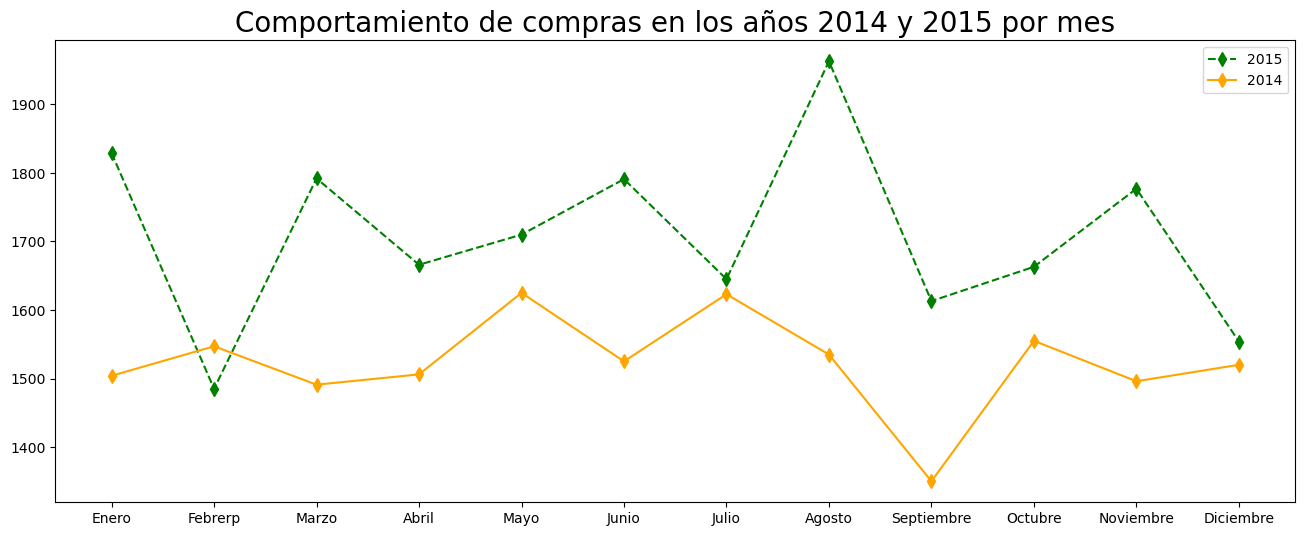

In [76]:
Frame = df[df['Year'] == 2015].Month.value_counts().sort_index(ascending=True)
plt.plot(Frame, c='green', ls='--', marker = 'd', ms=7, label='2015')

Frame = df[df['Year'] == 2014].Month.value_counts().sort_index(ascending=True)
plt.plot(Frame, c='orange', ls='-', marker = 'd', ms=7, label='2014')

plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.xticks(list(range(1,13)), MonthsOfYear)
plt.title('Comportamiento de compras en los años 2014 y 2015 por mes', fontsize=20)
plt.show()


### Comportamiento de compras en los dos años en los días de la semana

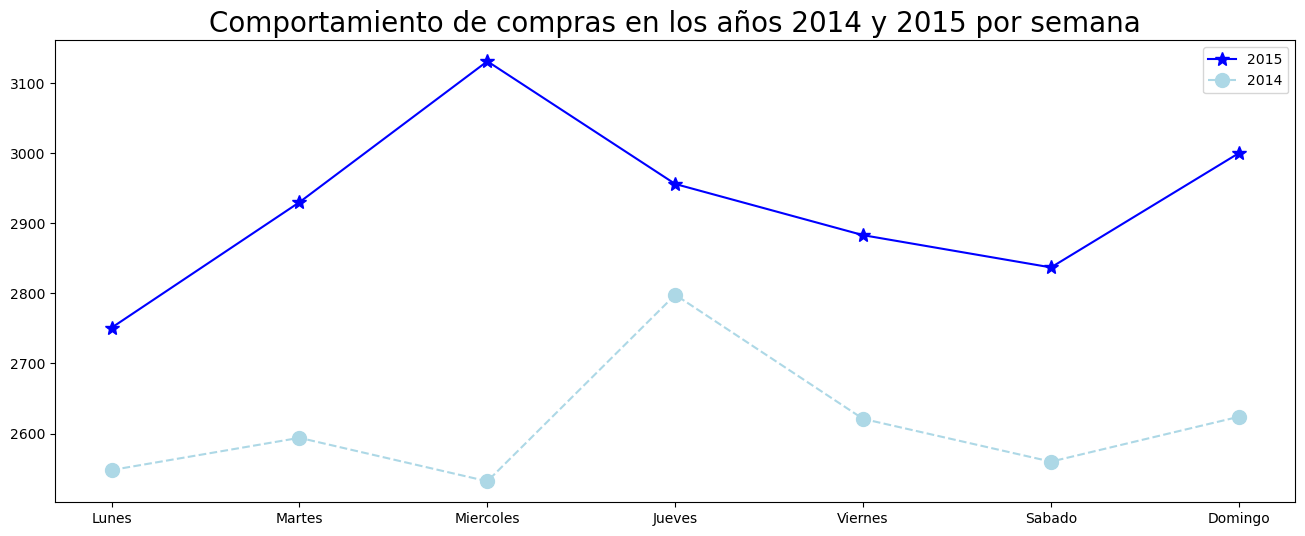

In [77]:
Frame = df[df['Year'] == 2015].Day.value_counts().sort_index(ascending=True)
plt.plot(Frame, c='blue', ls='-', marker = '*', ms=10, label='2015')

Frame = df[df['Year'] == 2014].Day.value_counts().sort_index(ascending=True)
plt.plot(Frame, c='lightblue', ls='--', marker = 'o', ms=10, label='2014')

plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.xticks(list(range(0,7)), DaysOfWeek)
plt.title('Comportamiento de compras en los años 2014 y 2015 por semana', fontsize=20)
plt.show()

> <font color='darkcyan'><b><h2>Reflexión I</h2></b></font>
>


<p style='text-align: justify;'>Deduciendo rápidamente, nos damos cuenta que la popularidad de la tienda en cuanto a ventas aumento a lo largo de un año, en 2015 el día más popular o más frecuente por los clientes es el miércoles mientras en 2014 es el jueves. Los días domingo también son días muy populares, esto debido a que la mayoría de las personas descansan los fines de semana y aprovechan el tiempo para ir de compras. No tenemos suficiente información, pero se puede inferir que los días miércoles se colocan más ofertas y eso se ve reflejado en las ventas.</p>


### Productos destacados y aquellos menos populares

C:\Users\DESCOBAR\AppData\Local\Temp\ipykernel_6552\251584774.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


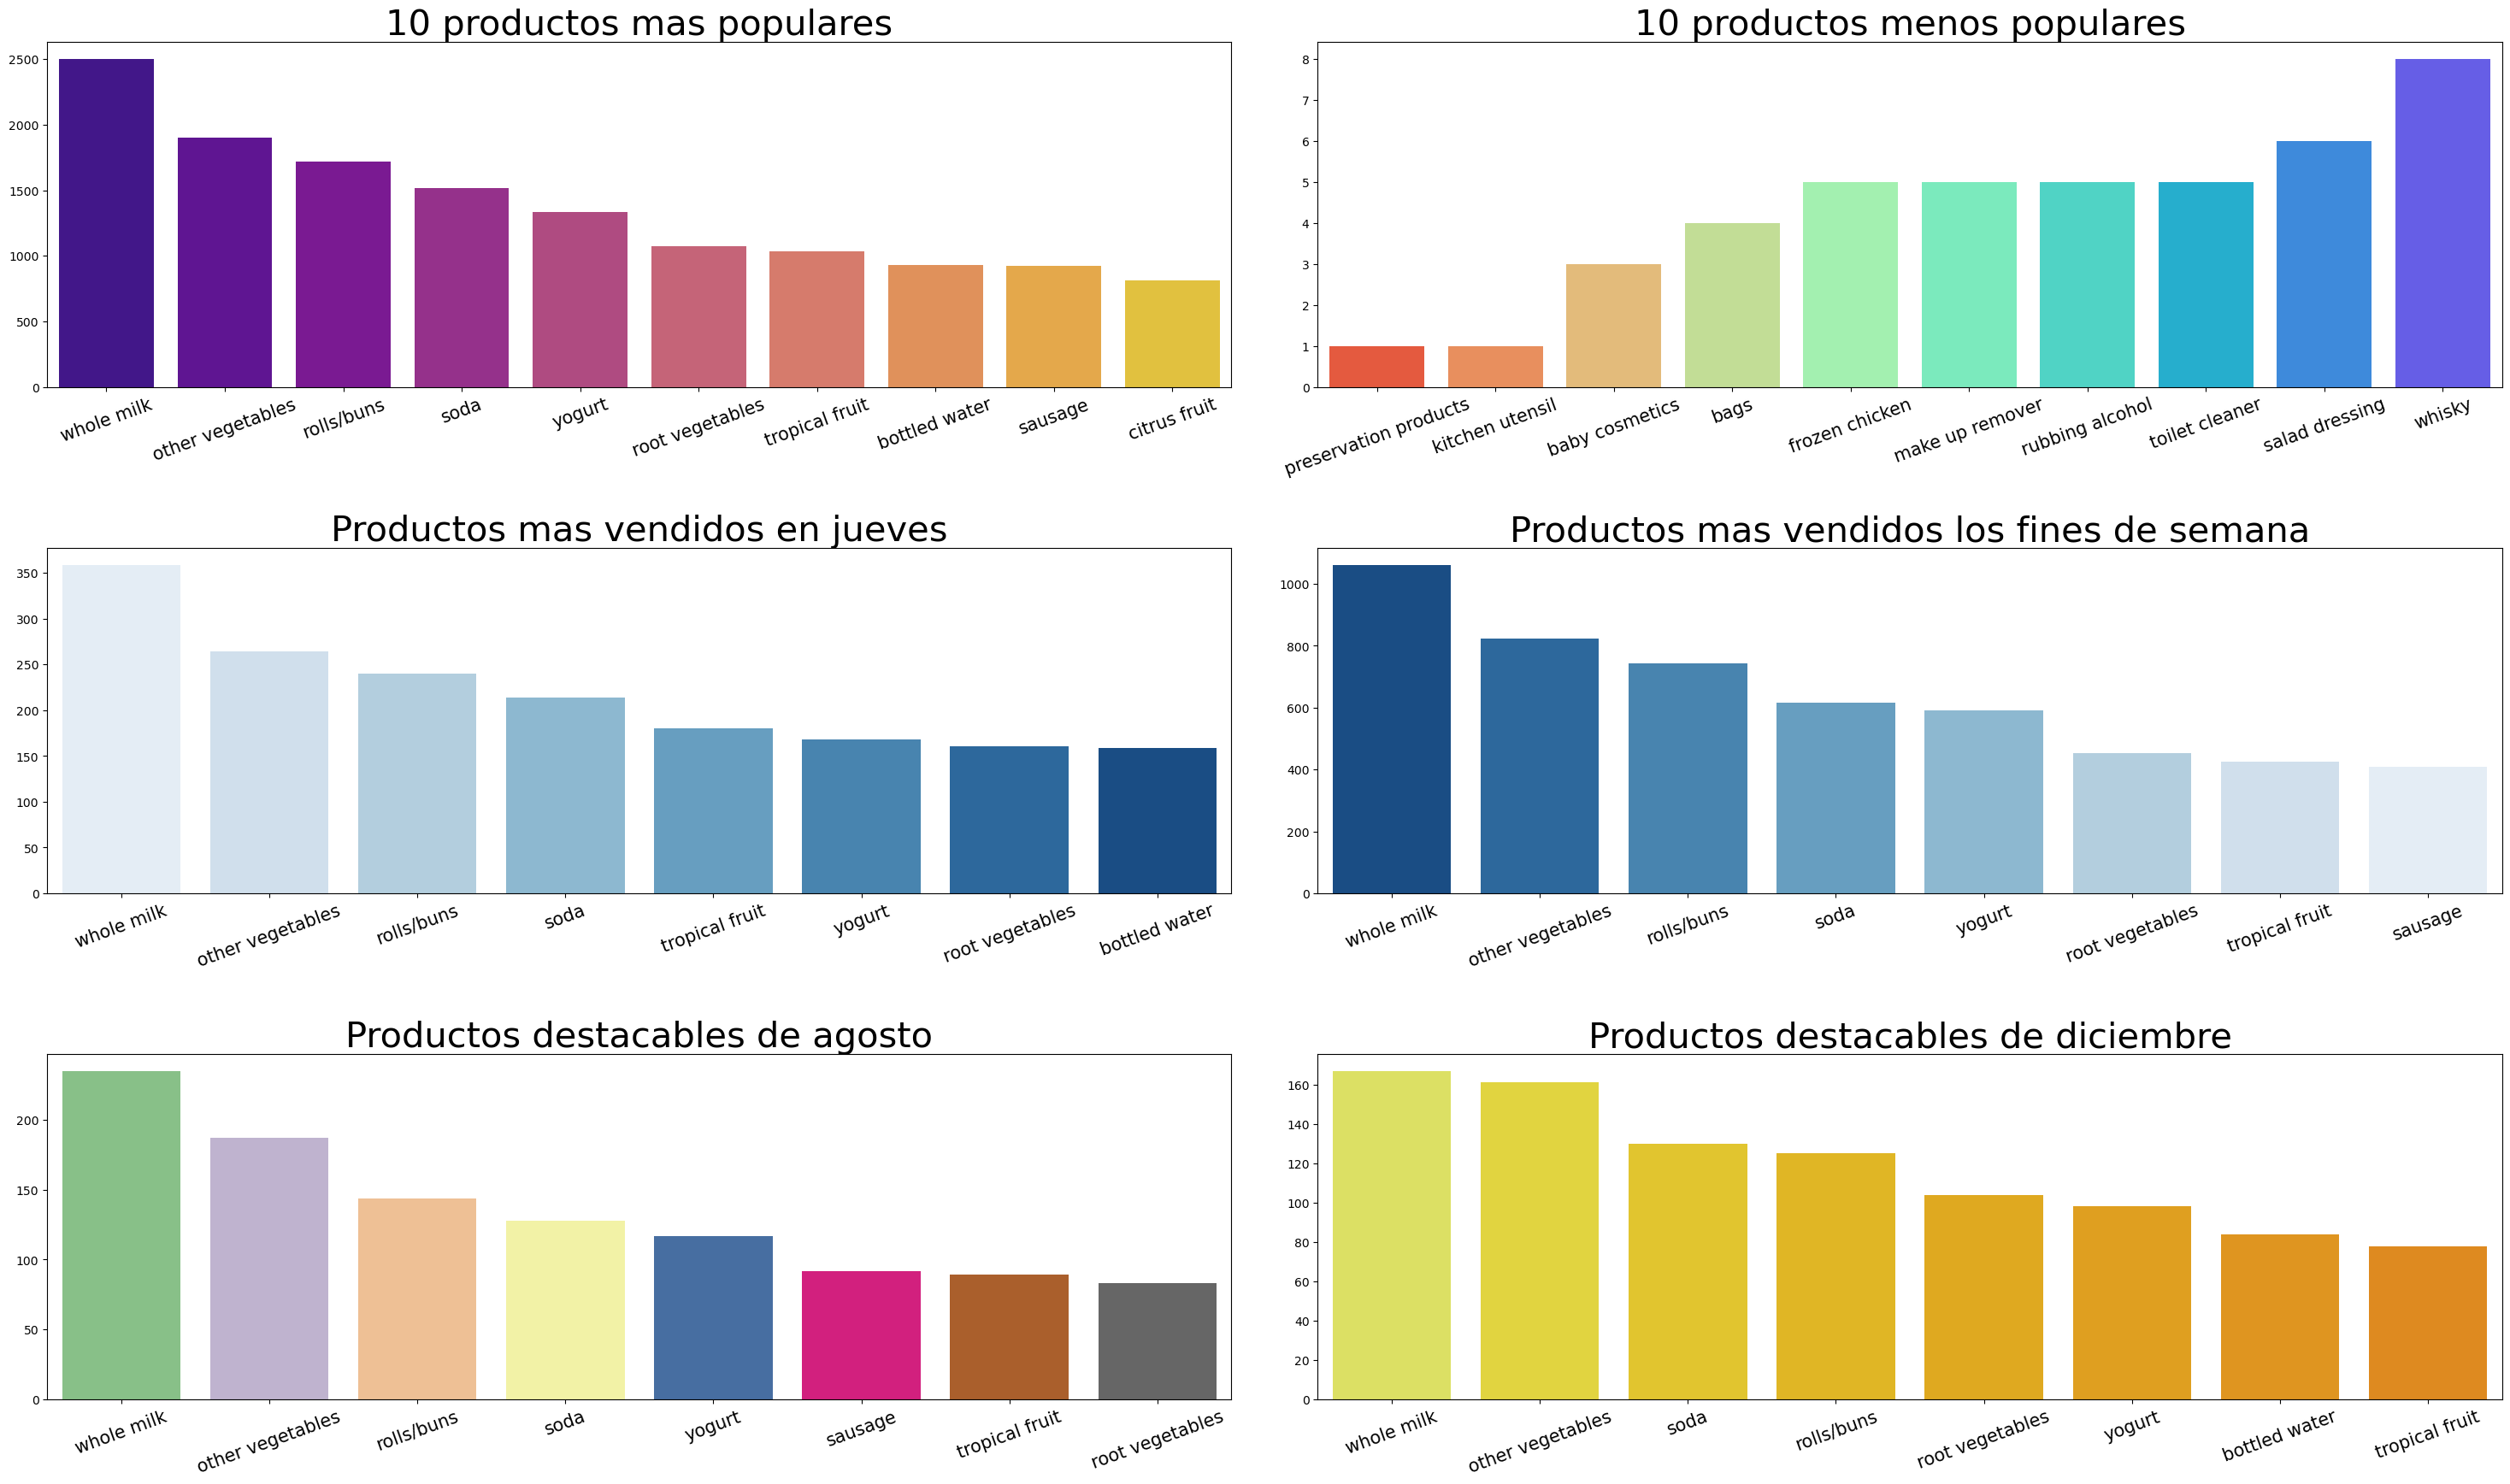

In [83]:
f, ax = plt.subplots(3,2,figsize=(30, 18))

# se define una función para codear menos.
def BarPlot(x, y, ax, title, palette):
    Plot = sns.barplot(x = x, y= y, ax=ax, palette=palette)
    Plot.set_title(title, fontsize=30)
    Plot.set_xticklabels(Plot.get_xticklabels(), rotation=20, fontsize=15)
    

Frame = df['itemDescription'].value_counts().sort_values(ascending = False)[:10]
BarPlot(Frame.index, Frame.values, ax[0,0], '10 productos mas populares', 'plasma')

Frame = df['itemDescription'].value_counts().sort_values(ascending = True)[:10]
BarPlot(Frame.index, Frame.values, ax[0,1], '10 productos menos populares', 'rainbow_r')

Frame = df[(df['Day'] == 3)]
Frame = Frame['itemDescription'].value_counts().sort_values(ascending=False)[:8]
BarPlot(Frame.index, Frame.values, ax[1,0], 'Productos mas vendidos en jueves', 'Blues')

Frame = df[(df['Day'] == 6) | (df['Day'] == 5) | (df['Day'] == 4)]
Frame = Frame['itemDescription'].value_counts().sort_values(ascending=False)[:8]
BarPlot(Frame.index, Frame.values, ax[1,1], 'Productos mas vendidos los fines de semana', 'Blues_r')

Frame = df[(df['Month'] == 8)]
Frame = Frame['itemDescription'].value_counts().sort_values(ascending=False)[:8]
BarPlot(Frame.index, Frame.values, ax[2,0], 'Productos destacables de agosto', 'Accent')

Frame = df[(df['Month'] == 12)]
Frame = Frame['itemDescription'].value_counts().sort_values(ascending=False)[:8]
BarPlot(Frame.index, Frame.values, ax[2,1], 'Productos destacables de diciembre', 'Wistia')

f.tight_layout(pad=3.0)
f.show()

 ### Productos que mas destacan por medio de WordCloud

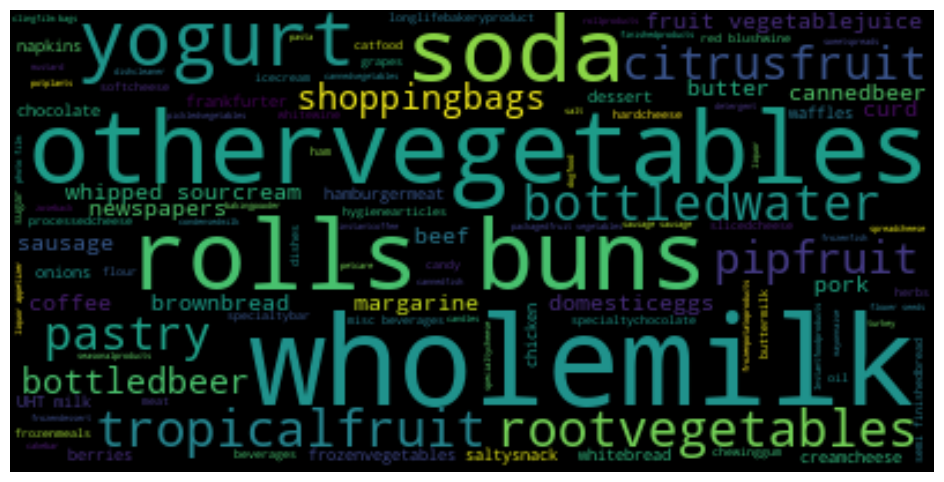

In [84]:
Text = ''
for index, value in enumerate(df['itemDescription']):
    Text += ' ' + value.replace(" ", '')
Wc = WordCloud().generate(Text)

plt.imshow(Wc, interpolation='bilinear')
plt.axis("off")
plt.show()

> <font color='darkcyan'><b><h2>Reflexión II</h2></b></font>
>


<p style='text-align: justify;'>Por mucho, el producto más vendido es leche y vegetables, lo básico en alimentos. Existen productos como utensilios de cocina o productos de preservación. El mercado verdaderamente importante para esta tienda son los productos de canasta básica y frescos: Frutas, vegetales, carnes, leche, entre otros. Lo idea es enfocarse en estos productos e implementar estrategias de venta en estos productos que la clientela busca.</p>


> <font color='darkcyan'><b><h2>Preparación de data para el modelo Apriori</h2></b></font>
>


In [94]:
# se binarizan los items del dataset
OneHot = pd.get_dummies(df['itemDescription'])


AprioriData = pd.DataFrame(df)
AprioriData.drop(['itemDescription'], inplace=True, axis=1)
AprioriData = AprioriData.join(OneHot)

Products = df.itemDescription.unique()
AprioriData = AprioriData.groupby(['Member_number', 'Date'])[Products[:]].sum()
AprioriData = AprioriData.reset_index()
AprioriData.head()

,Member_number,Date,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,butter,fruit/vegetable juice,packaged fruit/vegetables,chocolate,specialty bar,butter milk,bottled water,yogurt,sausage,brown bread,hamburger meat,root vegetables,pork,pastry,canned beer,berries,coffee,misc. beverages,ham,turkey,curd cheese,red/blush wine,frozen potato products,flour,sugar,frozen meals,herbs,soda,detergent,grapes,processed cheese,fish,sparkling wine,newspapers,curd,pasta,popcorn,finished products,beverages,bottled beer,dessert,dog food,specialty chocolate,condensed milk,cleaner,white wine,meat,ice cream,hard cheese,cream cheese,liquor,pickled vegetables,liquor (appetizer),UHT-milk,candy,onions,hair spray,photo/film,domestic eggs,margarine,shopping bags,salt,oil,whipped/sour cream,frozen vegetables,sliced cheese,dish cleaner,baking powder,specialty cheese,salty snack,Instant food products,pet care,white bread,female sanitary products,cling film/bags,soap,frozen chicken,house keeping products,spread cheese,decalcifier,frozen dessert,vinegar,nuts/prunes,potato products,frozen fish,hygiene articles,artif. sweetener,light bulbs,canned vegetables,chewing gum,canned fish,cookware,semi-finished bread,cat food,bathroom cleaner,prosecco,liver loaf,zwieback,canned fruit,frozen fruits,brandy,baby cosmetics,spices,napkins,waffles,sauces,rum,chocolate marshmallow,long life bakery product,bags,sweet spreads,soups,mustard,specialty fat,instant coffee,snack products,organic sausage,soft cheese,mayonnaise,dental care,roll products,kitchen towels,flower soil/fertilizer,cereals,meat spreads,dishes,male cosmetics,candles,whisky,tidbits,cooking chocolate,seasonal products,liqueur,abrasive cleaner,syrup,ketchup,cream,skin care,rubbing alcohol,nut snack,cocoa drinks,softener,organic products,cake bar,honey,jam,kitchen utensil,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,1000,2014-06-24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1000,2015-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1000,2015-05-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1000,2015-07-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1000,2015-11-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
AprioriData = AprioriData.drop(['Member_number', 'Date'], axis=1)

In [91]:
AprioriData.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,butter,fruit/vegetable juice,packaged fruit/vegetables,chocolate,specialty bar,butter milk,bottled water,yogurt,sausage,brown bread,hamburger meat,root vegetables,pork,pastry,canned beer,berries,coffee,misc. beverages,ham,turkey,curd cheese,red/blush wine,frozen potato products,flour,sugar,frozen meals,herbs,soda,detergent,grapes,processed cheese,fish,sparkling wine,newspapers,curd,pasta,popcorn,finished products,beverages,bottled beer,dessert,dog food,specialty chocolate,condensed milk,cleaner,white wine,meat,ice cream,hard cheese,cream cheese,liquor,pickled vegetables,liquor (appetizer),UHT-milk,candy,onions,hair spray,photo/film,domestic eggs,margarine,shopping bags,salt,oil,whipped/sour cream,frozen vegetables,sliced cheese,dish cleaner,baking powder,specialty cheese,salty snack,Instant food products,pet care,white bread,female sanitary products,cling film/bags,soap,frozen chicken,house keeping products,spread cheese,decalcifier,frozen dessert,vinegar,nuts/prunes,potato products,frozen fish,hygiene articles,artif. sweetener,light bulbs,canned vegetables,chewing gum,canned fish,cookware,semi-finished bread,cat food,bathroom cleaner,prosecco,liver loaf,zwieback,canned fruit,frozen fruits,brandy,baby cosmetics,spices,napkins,waffles,sauces,rum,chocolate marshmallow,long life bakery product,bags,sweet spreads,soups,mustard,specialty fat,instant coffee,snack products,organic sausage,soft cheese,mayonnaise,dental care,roll products,kitchen towels,flower soil/fertilizer,cereals,meat spreads,dishes,male cosmetics,candles,whisky,tidbits,cooking chocolate,seasonal products,liqueur,abrasive cleaner,syrup,ketchup,cream,skin care,rubbing alcohol,nut snack,cocoa drinks,softener,organic products,cake bar,honey,jam,kitchen utensil,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
def Names(x):
    for Product in Products:
        if x[Product] != 0:
            x[Product] = Product
    return x

AprioriData = AprioriData.apply(Names, axis=1)
AprioriData.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,butter,fruit/vegetable juice,packaged fruit/vegetables,chocolate,specialty bar,butter milk,bottled water,yogurt,sausage,brown bread,hamburger meat,root vegetables,pork,pastry,canned beer,berries,coffee,misc. beverages,ham,turkey,curd cheese,red/blush wine,frozen potato products,flour,sugar,frozen meals,herbs,soda,detergent,grapes,processed cheese,fish,sparkling wine,newspapers,curd,pasta,popcorn,finished products,beverages,bottled beer,dessert,dog food,specialty chocolate,condensed milk,cleaner,white wine,meat,ice cream,hard cheese,cream cheese,liquor,pickled vegetables,liquor (appetizer),UHT-milk,candy,onions,hair spray,photo/film,domestic eggs,margarine,shopping bags,salt,oil,whipped/sour cream,frozen vegetables,sliced cheese,dish cleaner,baking powder,specialty cheese,salty snack,Instant food products,pet care,white bread,female sanitary products,cling film/bags,soap,frozen chicken,house keeping products,spread cheese,decalcifier,frozen dessert,vinegar,nuts/prunes,potato products,frozen fish,hygiene articles,artif. sweetener,light bulbs,canned vegetables,chewing gum,canned fish,cookware,semi-finished bread,cat food,bathroom cleaner,prosecco,liver loaf,zwieback,canned fruit,frozen fruits,brandy,baby cosmetics,spices,napkins,waffles,sauces,rum,chocolate marshmallow,long life bakery product,bags,sweet spreads,soups,mustard,specialty fat,instant coffee,snack products,organic sausage,soft cheese,mayonnaise,dental care,roll products,kitchen towels,flower soil/fertilizer,cereals,meat spreads,dishes,male cosmetics,candles,whisky,tidbits,cooking chocolate,seasonal products,liqueur,abrasive cleaner,syrup,ketchup,cream,skin care,rubbing alcohol,nut snack,cocoa drinks,softener,organic products,cake bar,honey,jam,kitchen utensil,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,pastry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,salty snack,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,yogurt,sausage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,semi-finished bread,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,soda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,pickled vegetables,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,canned beer,0,0,misc. beverages,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sausage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,hygiene articles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
AprioriArray = AprioriData.values
Transactions = []

for i in range(AprioriArray.shape[0]):
    x = []
    for j in range(AprioriArray.shape[1]):
        if AprioriArray[i,j] != 0:
            x.append(AprioriArray[i,j])
    Transactions.append(x)

Transactions[0:10]

[['whole milk', 'pastry', 'salty snack'],
 ['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread']]

> <font color='darkcyan'><b><h2>Despliegue Modelo Apriori</h2></b></font>
>


In [95]:
Rules = apriori(
    transactions = Transactions,
    min_support = 0.0003,
    min_confidence = 0.05,
    min_lift = 3,
    min_length = 2,
)

AssociationRules = list(Rules)

for item in AssociationRules:

    par = item[0] 
    items = [x for x in par]
    print("Regla:       " + items[0] + " -> " + items[1])
    print("Soporte:     " + str(item[1]))
    print("Confianza:   " + str(item[2][0][2]))
    print("Mejora lift: " + str(item[2][0][3]))
    print("***************************************************")

Regla:       liver loaf -> fruit/vegetable juice
Soporte:     0.00040098910646260775
Confianza:   0.12
Mejora lift: 3.5276227897838903
***************************************************
Regla:       pickled vegetables -> ham
Soporte:     0.0005346521419501437
Confianza:   0.05970149253731344
Mejora lift: 3.4895055970149254
***************************************************
Regla:       roll products  -> meat
Soporte:     0.0003341575887188398
Confianza:   0.06097560975609757
Mejora lift: 3.620547812620984
***************************************************
Regla:       salt -> misc. beverages
Soporte:     0.0003341575887188398
Confianza:   0.05617977528089888
Mejora lift: 3.5619405827461437
***************************************************
Regla:       spread cheese -> misc. beverages
Soporte:     0.0003341575887188398
Confianza:   0.05
Mejora lift: 3.170127118644068
***************************************************
Regla:       soups -> seasonal products
Soporte:     0.000334157

> <font color='darkcyan'><b><h2>Conclusión</h2></b></font>
>


<p style='text-align: justify;'>El algoritmo nos arroja estas reglas, realmente no existe una destacable debido a los bajos valores de soporte. Efectivamente hay días en que la compra es altisima, pero la soporte entre ellas es bastante bajo.</p>


<p style='text-align: justify;'>Por ejemplo, el soporte de <b>butter milk -> yogurt</b> es de <b>0.0003341575887188398</b> lo cual, desde mi mirada, cuado compro mantequilla generalmente compro yogurt, claro es mi caso particular.</p>

---
<center><h1>Facultad de Ingeniería y Negocios</h1></center>
<center><h1>Magíster en Data Science</h1></center>
<center><h3>Profesor Sr. Jorge Castillo</h3></center>
<center><h3>Profesor Sr. Patricio Araneda</h3></center>

---